In [1068]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn as sk 
from  sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression



## Setting

 
<img src="https://i1.sndcdn.com/artworks-000502633698-vxm3q1-t500x500.jpg" alt="Someone study" width="200" height="200">

The dataset contains data on the grade point average (GPA) of students enrolled in a fairly large research university that also supports men’s and women’s athletics at the Division I level.  The number of observations equals 4137 (students). This data set includes the following variables: 

|variables|description|
|---|---|
|Sat | combined SAT score |
|tothrs |  total hours of classes taken through fall semester |
|colgpa|GPA after fall semester |
|athlete|=1 if athlete |
|verbmath|verbal/math SAT score |
|hsize|size graduating class, 100s |
|shrank|rank in graduating class |
|hsperc|high school percentile, from top |
|female|=1 if female |
|white|=1 if white |
|black|=1 if black |
|minority|=1 if nonblack and nonwhite  |

 

  

Scholastic Assessment Test (SAT) is the national standardized test taken by all four-year college-bound students in the United States. 


In [1069]:
gpa=pd.read_csv("gpa.csv")
gpa 

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,minority
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,1
1,1170,18,4.00,0,0.82813,9.40,191,20.319150,0,1,0,0
2,810,14,1.78,1,0.88372,1.19,42,35.294120,0,1,0,0
3,940,40,2.42,0,0.80769,5.71,252,44.133100,0,1,0,0
4,1180,18,2.61,0,0.73529,2.14,86,40.186920,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4132,990,49,2.24,0,1.02041,2.33,89,38.197430,1,1,0,0
4133,900,50,2.46,0,0.95652,0.10,2,20.000000,1,1,0,0
4134,1340,62,4.00,0,0.94203,0.45,1,2.222222,0,1,0,0
4135,980,12,2.83,0,0.68966,0.35,23,65.714290,1,1,0,0


## Q1. [14 points]

 

Randomly sample 500 students **without replacement** from the original dataset based on `DataFrame.sample()` method. Use `random_state=300`.

Using only the information of these 500 students, test the following hypothesis using $\alpha=0.05$: 

*The average GPA of the students from this university is lower than 3.*

In your answer, provide the following information

1.   Null hypothesis/Alternative hypothesis
2.   Test the hypothesis based on 1000 rounds of simulation using Bootstrapping. 
3.   Visualize the distribution of the sample statistics from simulation, the rejection region(s), and the observed statistics in the same graph.
4.   Provide the conclusion.
 

In [1070]:
gpa[['colgpa']].mean()

colgpa    2.652686
dtype: float64

Null hypothesis:$\mu \geq 3$
Alternate hypothesis:  $\mu < 3$

In [1071]:
subset=gpa.sample(n=500,replace=False,random_state=300)
avg=subset[["colgpa"]].mean()

In [1072]:
samples=subset.colgpa
samples_adj=samples-np.mean(samples)+3
observed_s=np.mean(samples)
observed_s
#np.mean(samples_adj)

2.684540000000001

In [1073]:
def sampling():
    samples_new=np.random.choice(samples_adj, size=500)
    return np.mean(samples_new)

In [1074]:
stats=[sampling() for i in range(1000)]

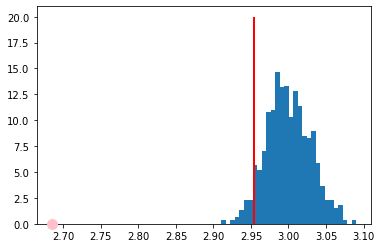

In [1075]:
plt.hist(stats,bins=30, density=True)
cutoffs=np.percentile(stats,5)
plt.vlines(cutoffs, 0, 20,color="red",lw= 2 )
plt.scatter(avg,0,c='pink',s=100,zorder=300,clip_on=False) #weird cutoff
plt.show()

#plt.show()

In [1076]:
if observed_s<=np.percentile(stats,5):
    print("we reject our null hypothesis")
    print("we have enough evidence to suggest that the average gpa of students is lower than 3")
else:
     print("we fail to reject our null hypothesis") 
     print("we don't have enough evidence to suggest that the average gpa of students is not lower than 3") 

we reject our null hypothesis
we have enough evidence to suggest that the average gpa of students is lower than 3


## Q2. [14 points]

Randomly sample 500 students **without replacement** from the original dataset based on `DataFrame.sample()` method. Use `random_state=300`.

Using only the information of these 500 students, test the following hypothesis using $\alpha=0.05$: 

*There is a difference between the average GPA of athletes and the average GPA non-athletes in this university*

In your answer, provide the following information

1.   Null hypothesis/Alternative hypothesis
2.   Test the hypothesis based on 1000 rounds of simulation based on Bootstrapping. 
3.   Visualize the distribution of the sample statistics from simulation, the rejection region(s), and the observed statistics in the same graph.
4.   Provide the conclusion.

In [1077]:
subset2=gpa.sample(n=500,replace=False,random_state=300)
subset2

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,minority
2378,1190,76,3.43,0,0.67606,2.83,8,2.826855,0,1,0,0
3454,1090,51,3.47,0,0.84746,2.46,19,7.723577,0,1,0,0
2447,840,124,2.62,0,0.82609,5.39,124,23.005570,1,1,0,0
2703,1180,14,1.50,1,0.81538,7.71,481,62.386510,0,1,0,0
2979,960,19,2.78,0,0.60000,0.20,7,35.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2037,900,16,1.81,0,1.04545,0.78,6,7.692307,1,0,1,0
2245,890,70,2.47,0,0.85417,1.06,14,13.207550,0,1,0,0
747,920,92,2.47,0,1.19048,2.11,60,28.436020,1,1,0,0
1568,1010,17,2.41,0,0.83636,2.37,32,13.502110,0,1,0,0


Null hypothesis:There is no difference between athlete gpa and non athlete gpa

Alternate hypothesis:There is a difference between athlete gpa and non athlete gpa

In [1078]:
df=subset2.groupby(by="athlete").mean()
print(subset2.colgpa.mean())
diff=2.698392-2.236667
diff_neg=2.236667-2.698392
#print(diff)
df

2.684540000000001


,sat,tothrs,colgpa,verbmath,hsize,hsrank,hsperc,female,white,black,minority
athlete,,,,,,,,,,,
0,1035.175258,50.973196,2.698392,0.886201,2.764454,49.482474,18.443256,0.501031,0.929897,0.047423,0.022680
1,907.333333,56.666667,2.236667,0.846721,3.602000,128.533333,33.741041,0.133333,0.600000,0.333333,0.066667


In [1079]:
def examine(column_n):
    combined=subset.loc[:,column_n].values
    athlete=subset2[subset2.athlete==1].loc[:,column_n].values
    nonathlete=subset2[subset2.athlete==0].loc[:,column_n].values
    athlete_adj=athlete-np.mean(athlete)+np.mean(combined)
    nonathlete_adj=nonathlete-np.mean(nonathlete)+np.mean(combined)
    return athlete_adj,nonathlete_adj,np.mean(athlete)-np.mean(nonathlete)
athlete_adj,nonathlete_adj,observed=examine("colgpa")    

In [1080]:
def sampling():
    athlete_n=np.random.choice(athlete_adj,size=len(athlete_adj))
    nonathlete_n=np.random.choice(nonathlete_adj,size=len(nonathlete_adj))
    return np.mean(athlete_n)-np.mean(nonathlete_n)

In [1081]:
var=[sampling()for i in range(1000)]

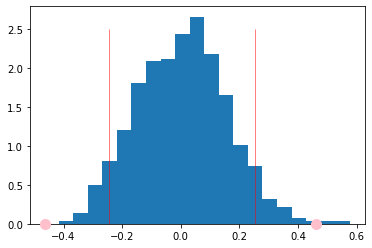

In [1082]:
plt.hist(var,bins=20,density=True)
cuttoffs=np.percentile(var,[5,95])
plt.vlines(cuttoffs,0,2.5,color="red",lw=0.5)
plt.scatter(diff,0,c='pink',s=100,zorder=300,clip_on=False)
plt.scatter(diff_neg,0,c='pink',s=100,zorder=300,clip_on=False)
plt.show()

In [1083]:
print(np.percentile(var,5),observed)
if observed<=np.percentile(var,5):
    print("We reject the null hypothesis")
    print("We have sufficient evidence to suggest that there is a difference between athlete and non-athlete gpa ")
else:
    print("We fail to reject the null hypothesis ")
    print("We don't have enough evidence to suggest that there is a difference between athlete and non-athlete gpa")

-0.2453642611683851 -0.46172508591065275
We reject the null hypothesis
We have sufficient evidence to suggest that there is a difference between athlete and non-athlete gpa 


In [1084]:
observed=observed*-1
print(np.percentile(var,95),observed)
if observed>=np.percentile(var,95):
    print("We reject the null hypothesis")
    print("We have sufficient evidence to suggest that there is a difference between athlete and non-athlete gpa ")
else:
    print("We fail to reject the null hypothesis ")
    print("We don't have enough evidence to suggest that there is a difference between athlete and non-athlete gpa")

0.25227903780068656 0.46172508591065275
We reject the null hypothesis
We have sufficient evidence to suggest that there is a difference between athlete and non-athlete gpa 


## Q3. [6 Points]

For this question, let's use the full dataset again.


* Split the data into three components:

> * First, randomly select 3000 samples from the original dataset as the training set using `train_test_split`. Use random_state=30. Do not shuffle the data. 

> * Next, from the rest of the data, randomly select 500 samples as the validation using `train_test_split`. Use random_state=40. Do not shuffle the data. 

> * The observations that are left will be used as the testing set. 

* Report the average value of `sat` column for  each set of data.


In [1085]:
#gpa.sample(n=3000,replace=False,random_state=300)

In [1086]:
train,test=train_test_split(gpa,train_size=3000,shuffle=False,random_state=30)
train,validation=train_test_split(train,shuffle=False,test_size=500,random_state=40)
#print("train:",train)
#print("test:",test)
#print("validation:", validation)
validation.sat.mean(),train.sat.mean(),test.sat.mean()



(1017.52, 1034.392, 1027.0360598065083)

## Q4. [16 Points]

Using the 3 datasets you created in Q3, select the best model of the following three for prediction of college GPA.

Model1:
$$colgpa=\beta_0+\beta_1 sat +\epsilon$$

Model 2:
$$colgpa=\beta_0+\beta_1 sat +\beta_2 tothrs +\epsilon$$

Model 3:

$$colgpa=\beta_0+\beta_1 sat +\beta_2 tothrs +\beta_3 verbmath+\epsilon$$



* Train each model on the training set, report RMSE on the validation set for each model. Choose the model that gives the lowest RMSE as the best model. 
* Use the best model to predict the outcome on the testing set. Use scatter plot to present the relationship between the actual outcome (x-axis) and the predicted value (y-axis). In the same graph, add a line plot starting from (0,0) to (4,4). Based on the graph, comment on how well the model predicts the GPA. 
* If a person has tothrs=40, sat=1000,verbmath=0.5, based on the best model, calculate the predicted GPA?

In [1088]:
var=train.values

In [1089]:
X=var[:,[0]]
y=var[:,2]
model1=LinearRegression().fit(X,y)

In [1090]:
X=var[:,[0,1]]
y=var[:,2]
model2=LinearRegression().fit(X,y)

In [1091]:
X=var[:,[0,1,4]]
y=var[:,2]
model3=LinearRegression().fit(X,y)

In [1092]:
#RSME
validation=validation.values
one=np.mean((model1.predict(validation[:,[0]])-validation[:,2])**2)**0.5

In [1093]:
two=np.mean((model2.predict(validation[:,[0,1]])-validation[:,2])**2)**0.5

In [1094]:
three=np.mean((model3.predict(validation[:,[0,1,4]])-validation[:,2])**2)**0.5

In [1095]:
print("RSME 1:",one)
print("RSME 2:",two)
print("RSME 3:",three)
print("Model two has the smallest RSME")

RSME 1: 0.6063253803545715
RSME 2: 0.5956127530003608
RSME 3: 0.5957805183529497
Model two has the smallest RSME


In [1096]:
actual=test["colgpa"]
predicted=model2.predict(test[["sat","tothrs"]])

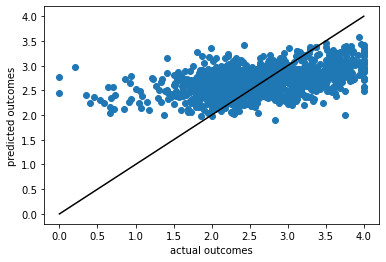

In [1097]:
plt.scatter(actual,predicted)
plt.plot(np.array([0,4]),np.array([0,4]),color="black")
plt.xlabel("actual outcomes")
plt.ylabel("predicted outcomes")
plt.show()

The model does not predict the gpa very well because the line is shown where the actual and predicted outcomes are equal and not a lot of points lie on this line meaning there is not a lot of interesection between the actual and predicted outcomes

In [1098]:
print(model2.predict([[1000,40]])[0])

2.58695551030301


## Q5 [10 Points]

Free 10 Points as a reward for your hard work in the past semester. Best luck with your final exams.

In [1099]:
#Thank you! :)